# Clusters pra todo mundo

## Funções

Importando as nossas funções que vimos no post.

In [1]:
from src.metricas import calculate_wcss, optimal_number_of_clusters

In [2]:
?calculate_wcss

Signature: calculate_wcss(data)
Docstring:
Calcula a soma dos quadrados intra-clusters para 19
quantidades de clusters, iniciando com o mínimo de 2 clusters

Parametros
----------
data : DataFrame
    conjunto de dados para fazer o `.fit()` do KMeans


Returns
-------
wcss : lista contendo os valores de soma de quadrados intra-cluster
File:      ~/work/kmeans/src/metricas.py
Type:      function


In [3]:
?optimal_number_of_clusters

Signature: optimal_number_of_clusters(wcss)
Docstring:
Calcula a maior distância entre os pontos que marcam as 
somas dos quadrados intra-clusters para 19 calculadas 
com `calculate_wcss()`

Parametros
----------
wcss : lista
    lista contendo os valores de soma de quadrados intra-cluster


Returns
-------
int : número de clusters 
File:      ~/work/kmeans/src/metricas.py
Type:      function


---

## Calculando KMeans para Iris

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from src.metricas import calculate_wcss, optimal_number_of_clusters


# preparando nossos dados
iris = sns.load_dataset('iris')
df = iris.drop('species', axis=1)

# calculando a soma dos quadrados para as 19 quantidade de clusters
sum_of_squares = calculate_wcss(df)

# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)

# inicializando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)

# predizendo nossos clusters
iris['clusters'] = kmeans.fit_predict(df)

# transformando as especies de iris em numeros para colorir o gráfico
iris['species_encoded'] = LabelEncoder().fit_transform(iris['species'])

---

## Gráfico de clusters olhando para comprimento e largura de pétalas

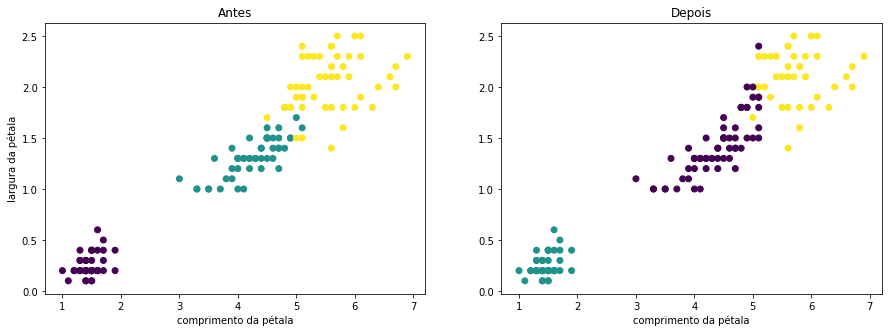

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Antes')
plt.xlabel('comprimento da pétala')
plt.ylabel('largura da pétala')
plt.scatter(iris['petal_length'], iris['petal_width'], c=iris['species_encoded'])


plt.subplot(1, 2, 2)
plt.title('Depois')
plt.xlabel('comprimento da pétala')
plt.scatter(iris['petal_length'], iris['petal_width'], c=iris['clusters'])

plt.show()